# This notebook contains Introduction/Business problem and Data 

#### Introduction

Singapore being multi-racial country offers a wide variety of food from Indian cuisine to even Japanese cuisine. Despite being crown as the world's most expensive city for the fifth year in a row by The Economist Intelligence Unit, there are still many affordable food and cuisine available for Singaporeans. Using the skills and tools to use location data to explore geographical location (in this case Singapore), I will carefully review and select an area of choice to open up my food business which sells Hainanese chicken rice.

#### Data

I'll need data including:
1. surrounding attractions or sight seeing and offices if any
2. any similar business of selling the same food as I am
3. the catergory of venues 
4. population of respective district

The data needed allows me to start my business in an area with less competition and a high volume of people. 


This project mainly uses Foursqaure API to gather these data 

## 1.  Find the longtitude and latitude of Singapore using Geopy library

### Importing all the neccessary libraries etc...

In [2]:
conda install -c conda-forge geopy --yes

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Libraries imported.


#### Getting the geographical location of Singapore

In [23]:
address = 'Singapore'

geolocator = Nominatim(user_agent="sg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.357107, 103.8194992.


## 2.  Using the geographic location of the 28 districts in singapore , visualize these districts on a map

In [36]:
# Coordinates of the 28 district in Singapore are tabulted in the csv file below
df_district = pd.read_csv('districts.csv', sep=',', delimiter=None)
df_district

,District,Longtitude,Latitude
0,Raffles Place,103.8513,1.2830
1,Tanjong Pagar,103.8468,1.2763
2,Tiong Bahru,103.8253,1.2864
3,Clementi,103.7649,1.3162
4,Beach road,103.5113,1.1725
5,Golden Mile,103.8651,1.3027
6,Little India,103.8518,1.3066
7,Orchard,103.8318,1.3048
8,Bukit Timah,103.8021,1.3294
9,Novena,103.8424,1.3209


In [39]:
# create map of Manhattan using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_district['Latitude'], df_district['Longtitude'], df_district['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sg)  
    
map_sg

## 3. Now that we have 28 districts to choose to set up my food business, the next step is to review them one by one, by exploring the venues around each district. To do so, we will use Fourquare API.

In [40]:
#defining Fourquare Credientials and Versions

CLIENT_ID = 'FC0W41Q2JKZHAMWIPZIOWGGAF4ZJIZNAMCVSXJP5ER5PMT4M' # your Foursquare ID
CLIENT_SECRET = 'EYZRPBNLPIKCQTSRJLXPJSXSMEZ30IBXPGWCFNQN3DFIXCNH' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FC0W41Q2JKZHAMWIPZIOWGGAF4ZJIZNAMCVSXJP5ER5PMT4M
CLIENT_SECRET:EYZRPBNLPIKCQTSRJLXPJSXSMEZ30IBXPGWCFNQN3DFIXCNH


In [46]:
# explore first district in the map
df_district.loc[0,'District']

district_latitude = df_district.loc[0, 'Latitude'] # neighborhood latitude value
district_longitude = df_district.loc[0, 'Longtitude'] # neighborhood longitude value

district_name = df_district.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(district_name, 
                                                               district_latitude, 
                                                               district_longitude))

Latitude and longitude values of Raffles Place are 1.283, 103.8513.


In [47]:
# Getting the top 100 venues that are in Raffles Place within radius of 500 meters
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f042aa61582505d8f28b7d2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Financial District',
  'headerFullLocation': 'Financial District, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 68,
  'suggestedBounds': {'ne': {'lat': 1.2875000045000045,
    'lng': 103.85579272881824},
   'sw': {'lat': 1.2784999954999954, 'lng': 103.84680727118175}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55fe3da6498e0c5eaa442250',
       'name': 'CULINARYON',
       'location': {'address': 'One Raffles Place, tower 2 - 4th floor',
        'lat': 1.284876109016574,
        'lng': 103.85093299421413,
        'labeledLatLngs': [{'l

In [50]:
# extract category for all venues
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        
        return None
    else:
        return categories_list[0]['name']

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,CULINARYON,Comfort Food Restaurant,1.284876,103.850933
1,CITY Hot Pot Shabu shabu,Hotpot Restaurant,1.284173,103.851585
2,The Fullerton Bay Hotel,Hotel,1.283878,103.853314
3,Virgin Active,Gym / Fitness Center,1.284608,103.850815
4,Fat Saigon Boy,Vietnamese Restaurant,1.282977,103.849068
5,Artemis Grill,Modern European Restaurant,1.281964,103.850385
6,1-Altitude,Cocktail Bar,1.284794,103.851151
7,Grain Traders,Restaurant,1.281468,103.850039
8,The Daily Cut,Salad Place,1.284125,103.851468
9,The Tower Club,Lounge,1.282886,103.851112


In [65]:
# Now we will do the same to the rest of the districts
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['district', 
                  'district Latitude', 
                  'district Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [66]:
district_venues = getNearbyVenues(names=df_district['District'],
                                   latitudes=df_district['Latitude'],
                                   longitudes=df_district['Longtitude']
                                  )

Raffles Place
Tanjong Pagar
Tiong Bahru
Clementi
Beach road
Golden Mile
Little India
Orchard
Bukit Timah
Novena
Serangoon
Macpherson
Geylang
Joo Chiat
Bedok
Changi
Tampines
Punggol
Ang Mo Kia
Upper Bukit Timah
Jurong
Bukit Panjang
Lim Chu Kang
Kranji
Upper Thomson
Yishun
Seletar
Pasir Panjang


In [67]:
district_venues

,district,district Latitude,district Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Raffles Place,1.2830,103.8513,CULINARYON,1.284876,103.850933,Comfort Food Restaurant
1,Raffles Place,1.2830,103.8513,CITY Hot Pot Shabu shabu,1.284173,103.851585,Hotpot Restaurant
2,Raffles Place,1.2830,103.8513,The Fullerton Bay Hotel,1.283878,103.853314,Hotel
3,Raffles Place,1.2830,103.8513,Virgin Active,1.284608,103.850815,Gym / Fitness Center
4,Raffles Place,1.2830,103.8513,Fat Saigon Boy,1.282977,103.849068,Vietnamese Restaurant
5,Raffles Place,1.2830,103.8513,Artemis Grill,1.281964,103.850385,Modern European Restaurant
6,Raffles Place,1.2830,103.8513,1-Altitude,1.284794,103.851151,Cocktail Bar
7,Raffles Place,1.2830,103.8513,Grain Traders,1.281468,103.850039,Restaurant
8,Raffles Place,1.2830,103.8513,The Daily Cut,1.284125,103.851468,Salad Place
9,Raffles Place,1.2830,103.8513,The Tower Club,1.282886,103.851112,Lounge


In [69]:
# one hot encoding
district_onehot = pd.get_dummies(district_venues[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
district_onehot['District'] =district_venues['district'] 

# move neighborhood column to the first column
fixed_columns = [district_onehot.columns[-1]] + list(district_onehot.columns[:-1])
district_onehot = district_onehot[fixed_columns]

district_onehot.head()

,District,Accessories Store,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Canal,Cantonese Restaurant,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,English Restaurant,Farm,Farmers Market,Fast Food Restaurant,Food Court,Food Stand,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gastropub,German Restaurant,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Halal Restaurant,Health Food Store,High School,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Lounge,Malay Restaurant,Market,Massage Studio,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mosque,Motel,Movie Theater,Multiplex,Noodle House,North Indian Restaurant,Office,Outlet Store,Paper / Office Supplies Store,Park,Parking,Peking Duck Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Ramen Restaurant,Restaurant,Road,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Soba Restaurant,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Taxi Stand,Tea Room,Temple,Thai Restaurant,Theme Park Ride / Attraction,Theme Restaurant,Toy / Game Store,Track Stadium,Trail,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Waterfront,Wine Bar,Wings Joint,Yoga Studio
0,Raffles Place,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Raffles Place,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Raffles Place,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Raffles Place,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Raffles Place,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [70]:
district_grouped = district_onehot.groupby('District').mean().reset_index()
district_grouped

,District,Accessories Store,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Canal,Cantonese Restaurant,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,English Restaurant,Farm,Farmers Market,Fast Food Restaurant,Food Court,Food Stand,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gastropub,German Restaurant,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Halal Restaurant,Health Food Store,High School,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Lounge,Malay Restaurant,Market,Massage Studio,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mosque,Motel,Movie Theater,Multiplex,Noodle House,North Indian Restaurant,Office,Outlet Store,Paper / Office Supplies Store,Park,Parking,Peking Duck Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Ramen Restaurant,Restaurant,Road,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Soba Restaurant,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Taxi Stand,Tea Room,Temple,Thai Restaurant,Theme Park Ride / Attraction,Theme Restaurant,Toy / Game Store,Track Stadium,Trail,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Waterfront,Wine Bar,Wings Joint,Yoga Studio
0,Ang Mo Kia,0.000000,0.000000,0.000000,0.016667,0.000000,0.00,0.000000,0.033333,0.000000,0.000000,0.016667,0.016667,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.033333,0.000000,0.000000,0.033333,0.00,0.000000,0.016667,0.000000,0.016667,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.00,0.000000,0.000000,0.00,0.000000,0.083333,0.000000,0.016667,0.000000,0.000000,0.00,0.016667,0.050000,0.000000,0.00,0.016667,0.000000,0.016667,0.00,0.0,0.00,0.050000,0.100000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.016667,0.0000,0.000000,0.016667,0.0000,0.0,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.00,0.000000,0.000000,0.016667,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.016667,0.000000,0.000000,0.016667,0.033333,0.00,0.016667,0.000000,0.000000,0.016667,0.000000,0.033333,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.033333,0.033333,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bedok,0.000000,0.000000,0.000000,0.033333,0.000000,0.00,0.000000,0.0333

In [79]:
num_top_venues = 5

for hood in district_grouped['District']:
    print("----"+hood+"----")
    temp = district_grouped[district_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ang Mo Kia----
                  venue  freq
0            Food Court  0.10
1           Coffee Shop  0.08
2          Dessert Shop  0.05
3  Fast Food Restaurant  0.05
4           Supermarket  0.03


----Bedok----
                venue  freq
0  Chinese Restaurant  0.07
1         Supermarket  0.05
2          Food Court  0.05
3    Sushi Restaurant  0.05
4         Coffee Shop  0.05


----Bukit Panjang----
                venue  freq
0                Park  0.29
1          Food Court  0.29
2        Noodle House  0.14
3  Miscellaneous Shop  0.14
4              Market  0.14


----Bukit Timah----
               venue  freq
0               Pool   0.5
1                Gym   0.5
2  Accessories Store   0.0
3            Parking   0.0
4          Multiplex   0.0


----Changi----
              venue  freq
0  Airport Terminal  0.17
1       Bus Station  0.17
2              Road  0.08
3            Tunnel  0.08
4              Café  0.08


----Clementi----
                venue  freq
0         Coffee Shop

In [119]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## 4. Common venues category for each 28 district in singapore

In [281]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = district_grouped['District']

for ind in np.arange(district_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(district_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kia,Food Court,Coffee Shop,Fast Food Restaurant,Dessert Shop,Snack Place,Bubble Tea Shop,Breakfast Spot,Asian Restaurant,Supermarket,Sushi Restaurant
1,Bedok,Chinese Restaurant,Coffee Shop,Café,Supermarket,Sushi Restaurant,Food Court,Indian Restaurant,Garden Center,Japanese Restaurant,Bakery
2,Bukit Panjang,Park,Food Court,Miscellaneous Shop,Noodle House,Market,Fast Food Restaurant,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
3,Bukit Timah,Pool,Gym,Yoga Studio,Farmers Market,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Stand,Food Court
4,Changi,Airport Terminal,Bus Station,Sporting Goods Shop,Airport Service,Coffee Shop,Road,Tunnel,Movie Theater,Café,Men's Store
5,Clementi,Coffee Shop,Food Court,Dessert Shop,Chinese Restaurant,Asian Restaurant,Noodle House,Bus Station,Fried Chicken Joint,Shopping Mall,Japanese Restaurant
6,Geylang,Fast Food Restaurant,Asian Restaurant,Shopping Mall,Ramen Restaurant,Steakhouse,Bakery,Food Court,Supermarket,Snack Place,Burrito Place
7,Golden Mile,Thai Restaurant,Food Court,Bar,Italian Restaurant,Supermarket,Burger Joint,Park,BBQ Joint,Restaurant,Coffee Shop
8,Joo Chiat,Coffee Shop,Malay Restaurant,Café,Chinese Restaurant,Restaurant,Food Court,Asian Restaurant,Hotpot Restaurant,German Restaurant,Gym
9,Jurong,Japanese Restaurant,Chinese Restaurant,Coffee Shop,Café,Shopping Mall,Korean Restaurant,Multiplex,Food Court,Department Store,Sushi Restaurant


## 5. Another deciding factor of where would I set up my food business will be the flow of potential customers. In this case, I will utilise the estimated population for each district for evaluation.

### Note that even though the data below might be outdated, it can still be a good mode of evaluation

In [251]:
df_pop = pd.read_csv('population.csv')
df_pop

,District,Estiimated population
0,Ang Mo Kia,163950
1,Bedok,279380
2,Bukit Panjang,139280
3,Bukit Timah,77430
4,Changi,1830
5,Clementi,92420
6,Geylang,110200
7,Golden Mile,693
8,Jurong,79240
9,Kranji,10000


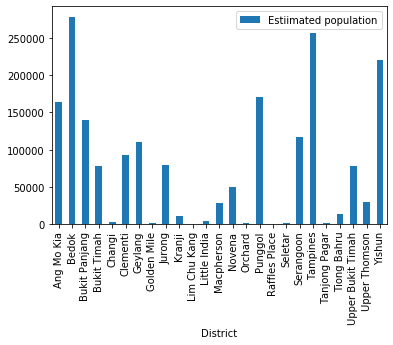

In [252]:
population = df_pop.plot.bar(x='District')

### By setting the criteria where if a district has less than 100,000 people, we can eliminate the respective district. 


In [273]:
# remove all rows with popluation less than 100,000
df_newpop = df_pop.drop(df_pop[df_pop['Estiimated population'] < 100000].index)
df_newpop

,District,Estiimated population
0,Ang Mo Kia,163950
1,Bedok,279380
2,Bukit Panjang,139280
6,Geylang,110200
15,Punggol,170560
18,Serangoon,116310
19,Tampines,256730
24,Yishun,220320


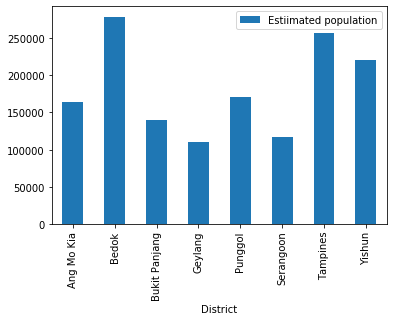

In [274]:
population_new = df_newpop.plot.bar(x='District')

## Now that we have left 8 districts after taking account into their respective population, we can now further evaluate the district to set up our food business.
### This will be done by first eliminating district with similar food choices in order to reduce competition

In [295]:
# need to first eliminate the districts with less than 100000 residents from the district_venues_sorted
x = district_venues_sorted.merge(df_pop)

#combining remaining venues category and respective district population
district_pop = x.drop(x[x['Estiimated population'] < 100000].index)
district_pop.reset_index()

,index,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Estiimated population
0,0,Ang Mo Kia,Food Court,Coffee Shop,Fast Food Restaurant,Dessert Shop,Snack Place,Bubble Tea Shop,Breakfast Spot,Asian Restaurant,Supermarket,Sushi Restaurant,163950
1,1,Bedok,Chinese Restaurant,Coffee Shop,Café,Supermarket,Sushi Restaurant,Food Court,Indian Restaurant,Garden Center,Japanese Restaurant,Bakery,279380
2,2,Bukit Panjang,Park,Food Court,Miscellaneous Shop,Noodle House,Market,Fast Food Restaurant,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,139280
3,6,Geylang,Fast Food Restaurant,Asian Restaurant,Shopping Mall,Ramen Restaurant,Steakhouse,Bakery,Food Court,Supermarket,Snack Place,Burrito Place,110200
4,15,Punggol,Chinese Restaurant,Playground,Dog Run,High School,Basketball Court,Farmers Market,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,170560
5,18,Serangoon,Asian Restaurant,Park,Bus Station,Grocery Store,Café,Fast Food Restaurant,Track Stadium,Trail,Indian Restaurant,Video Store,116310
6,19,Tampines,Indian Restaurant,Grocery Store,Plaza,Sandwich Place,South Indian Restaurant,Fast Food Restaurant,Housing Development,Hobby Shop,Dumpling Restaurant,Food Court,256730
7,24,Yishun,Chinese Restaurant,Food Court,Fried Chicken Joint,Supermarket,Coffee Shop,Italian Restaurant,Hainan Restaurant,Café,Noodle House,Burger Joint,220320


### Since I'm selling an afforable and common dish in Singapore, I will need to avoid district with Food Court and Coffee Shop where chicken rice (dish that I'm selling are usually sold). Hence that leaves us with only 2 districts: Punggol and Serangoon 

In [302]:
z = district_pop.drop(district_pop.index[0:4]).reset_index()
z.drop(z.index[2:4]).reset_index()

,level_0,index,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Estiimated population
0,0,15,Punggol,Chinese Restaurant,Playground,Dog Run,High School,Basketball Court,Farmers Market,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,170560
1,1,18,Serangoon,Asian Restaurant,Park,Bus Station,Grocery Store,Café,Fast Food Restaurant,Track Stadium,Trail,Indian Restaurant,Video Store,116310


# Given that population in Serangoon is higher than the population in Punggol, I have decided to set up my food business (selling Hainanese chicken rice) in the district SERANGOON.